# KeyWord Extraction

Question: What are the top keywords for all the papers?

Answer: Top 10 keywords: [('model', 78186), ('use', 42882), ('training', 28528), ('language', 27349), ('task', 23502), ('train', 20948), ('image', 19266), ('network', 19247), ('dataset', 18421), ('result', 18229)]

Total number of unique keywords assessed: 329163

Papers: 754/754

In [1]:
!pip install requests PyPDF2 tqdm


import pandas as pd
import requests
from tqdm import tqdm
import os
from PyPDF2 import PdfReader
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

import spacy


# English language model
nlp = spacy.load("en_core_web_sm")

# stopwords to exclude (e.g. the, is, and...)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# biblio words
additional_stopwords = ['et', 'al']

!pip install beautifulsoup4
from bs4 import BeautifulSoup

import logging
logging.getLogger("PyPDF2").setLevel(logging.ERROR)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# create directories: one for storing the downloaded PDFs and another for storing the converted text files

!mkdir pdfs
!mkdir texts

In [3]:
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

In [4]:
def get_pdf_url(link):
    if link.endswith(".pdf"):
        return link
    elif "arxiv.org" in link:
        return link.replace("abs", "pdf") + ".pdf"
    elif "nature.com" in link:
        # BeautifulSoup to find the PDF link on Nature pages
        response = requests.get(link)
        soup = BeautifulSoup(response.content, 'html.parser')
        pdf_link = soup.find('a', {'data-track-action': 'download pdf'})
        return pdf_link['href'] if pdf_link else None
    return None

def download_pdfs(dataset, column='Link', save_path='pdfs/'):
    """Download PDFs from the dataset."""
    failed_links = []
    for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
        link = row[column]
        if pd.notnull(link):
            pdf_url = get_pdf_url(link)
            if pdf_url:
                file_name = f"{save_path}{row['System'].replace('/', '_')}.pdf"
                try:
                    response = requests.get(pdf_url)
                    if response.status_code == 200:
                        with open(file_name, 'wb') as f:
                            f.write(response.content)
                    else:
                        failed_links.append(pdf_url)
                except Exception as e:
                    print(f"Error downloading {pdf_url}: {e}")
                    failed_links.append(pdf_url)
            else:
                failed_links.append(link)

    if failed_links:
        print("\nFailed to download the following links:")
        for link in failed_links:
            print(link)

# Download PDFs
download_pdfs(pcd_dataset)


  3%|▎         | 37/1210 [00:28<15:18,  1.28it/s]

Error downloading /articles/s42003-023-05133-1.pdf: Invalid URL '/articles/s42003-023-05133-1.pdf': No scheme supplied. Perhaps you meant https:///articles/s42003-023-05133-1.pdf?


  9%|▉         | 111/1210 [01:31<15:14,  1.20it/s]

Error downloading http://machinelearning.wustl.edu/mlpapers/paper_files/AISTATS2011_GlorotBB11.pdf: HTTPConnectionPool(host='machinelearning.wustl.edu', port=80): Max retries exceeded with url: /mlpapers/paper_files/AISTATS2011_GlorotBB11.pdf (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7c8a5272b160>: Failed to resolve 'machinelearning.wustl.edu' ([Errno -2] Name or service not known)"))


 14%|█▍        | 169/1210 [02:38<15:24,  1.13it/s]

Error downloading /articles/s41586-021-03819-2.pdf: Invalid URL '/articles/s41586-021-03819-2.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-021-03819-2.pdf?


 18%|█▊        | 212/1210 [03:31<19:33,  1.18s/it]

Error downloading /articles/s41746-021-00455-y.pdf: Invalid URL '/articles/s41746-021-00455-y.pdf': No scheme supplied. Perhaps you meant https:///articles/s41746-021-00455-y.pdf?


 25%|██▍       | 299/1210 [04:31<15:30,  1.02s/it]

Error downloading /articles/s41586-023-06747-5.pdf: Invalid URL '/articles/s41586-023-06747-5.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-023-06747-5.pdf?


 40%|████      | 489/1210 [07:34<11:40,  1.03it/s]

Error downloading /articles/s41467-019-11994-0.pdf: Invalid URL '/articles/s41467-019-11994-0.pdf': No scheme supplied. Perhaps you meant https:///articles/s41467-019-11994-0.pdf?


 43%|████▎     | 524/1210 [08:36<09:21,  1.22it/s]

Error downloading /articles/s41467-022-32007-7.pdf: Invalid URL '/articles/s41467-022-32007-7.pdf': No scheme supplied. Perhaps you meant https:///articles/s41467-022-32007-7.pdf?


 59%|█████▊    | 710/1210 [13:33<10:04,  1.21s/it]

Error downloading https://cs.nju.edu.cn/wujx/paper/AAAI2023_AFM.pdf: HTTPSConnectionPool(host='cs.nju.edu.cn', port=443): Max retries exceeded with url: /wujx/paper/AAAI2023_AFM.pdf (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))


 84%|████████▍ | 1017/1210 [18:08<02:31,  1.27it/s]

Error downloading /articles/s41586-023-06735-9.pdf: Invalid URL '/articles/s41586-023-06735-9.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-023-06735-9.pdf?


 90%|████████▉ | 1084/1210 [18:59<01:17,  1.63it/s]

Error downloading /articles/s41586-023-06419-4.pdf: Invalid URL '/articles/s41586-023-06419-4.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-023-06419-4.pdf?


100%|██████████| 1210/1210 [20:49<00:00,  1.03s/it]


Failed to download the following links:
https://pubmed.ncbi.nlm.nih.gov/19000969/
https://huggingface.co/karakuri-ai/karakuri-lm-70b-v0.1
https://www.aclweb.org/anthology/D12-1110/
https://www.semanticscholar.org/paper/Statistical-language-modeling-using-the-toolkit-Clarkson-Rosenfeld/fdf4aa623e4d5b5edaeb873ed8e8b1cef0b59c87
https://mp.weixin.qq.com/s/BUQWZ5EdR19i40GuFofpBg
https://openai.com/blog/image-gpt/
https://ieeexplore.ieee.org/abstract/document/7913730
https://jpn.nec.com/press/202307/20230706_02.html
https://www.adept.ai/blog/adept-fuyu-heavy
https://www.anthropic.com/index/introducing-claude
https://link.springer.com/article/10.1007/BF00337288
https://openai.com/blog/language-unsupervised/
https://engineering.linecorp.com/ja/blog/3.6-billion-parameter-japanese-language-model
http://www.lrec-conf.org/proceedings/lrec2022/pdf/2022.lrec-1.376.pdf

https://academic.oup.com/comjnl/article/6/3/232/360077
https://ieeexplore.ieee.org/document/6032006
https://www.microsoft.com/en-us

# Convert PDFs to text

In [5]:
from google.colab import drive
from tqdm import tqdm
from PyPDF2 import PdfReader
import os

drive.mount('/content/drive')

def convert_pdfs_to_text(pdf_folder='pdfs/', text_folder='/content/drive/My Drive/TextPapers/'):
    """Convert PDFs in a folder to text files."""
    # Create the destination folder in Google Drive if it doesn't exist
    os.makedirs(text_folder, exist_ok=True)
    for pdf_file in tqdm(os.listdir(pdf_folder)):
        if pdf_file.endswith('.pdf'):
            try:
                reader = PdfReader(f"{pdf_folder}{pdf_file}")
                text = ""
                for page in reader.pages:
                    text += page.extract_text() + "\n"
                text_file = pdf_file.replace('.pdf', '.txt')
                with open(f"{text_folder}{text_file}", 'w', encoding='utf-8') as f:
                    f.write(text)
            except Exception as e:
                print(f"Error processing {pdf_file}: {e}")

# Convert PDFs to text
convert_pdfs_to_text()

Mounted at /content/drive


  1%|          | 8/758 [00:12<16:13,  1.30s/it]

Error processing CODEFUSION (Python).pdf: EOF marker not found


  2%|▏         | 13/758 [00:18<21:59,  1.77s/it]

Error processing Context-dependent RNN.pdf: EOF marker not found


  2%|▏         | 17/758 [00:21<14:19,  1.16s/it]

Error processing Libratus.pdf: EOF marker not found


 63%|██████▎   | 477/758 [10:33<05:27,  1.16s/it]

Error processing RNN+LDA+KN5+cache.pdf: EOF marker not found


100%|██████████| 758/758 [16:08<00:00,  1.28s/it]


100%|██████████| 754/754 [24:23<00:00,  1.94s/it]


Top 10 keywords: [('model', 78186), ('use', 42882), ('training', 28528), ('language', 27349), ('task', 23502), ('train', 20948), ('image', 19266), ('network', 19247), ('dataset', 18421), ('result', 18229)]
Total number of unique keywords assessed: 266872


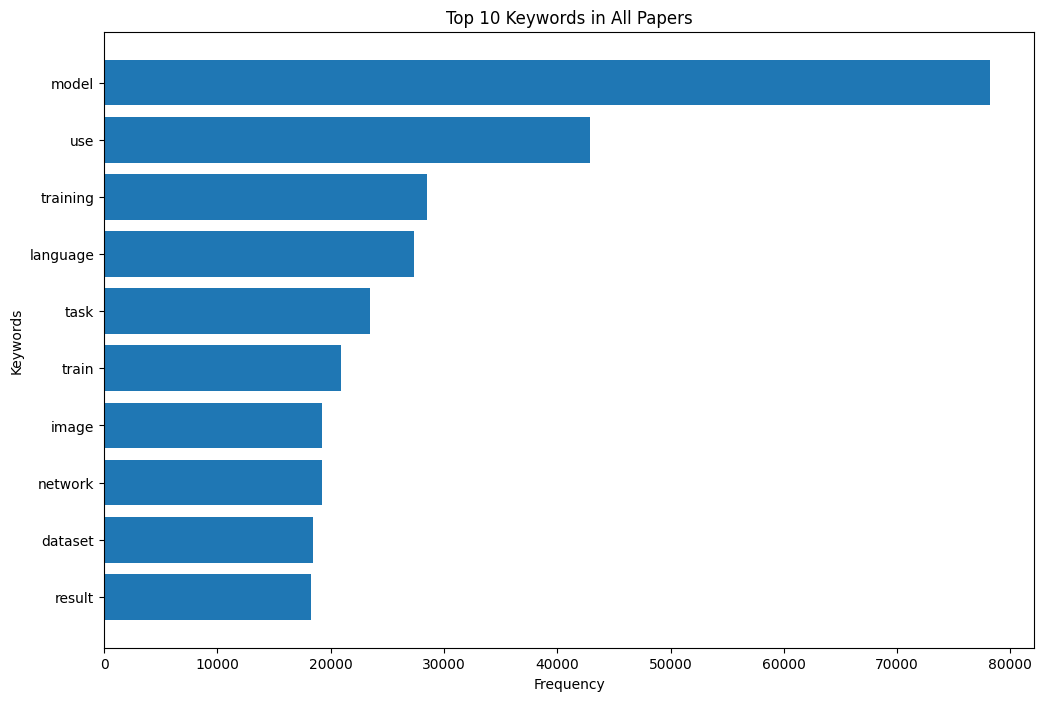

In [12]:
from tqdm import tqdm
from collections import Counter
from nltk.corpus import stopwords
import spacy
import os
import matplotlib.pyplot as plt
import wordninja

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text_folder='/content/drive/My Drive/TextPapers/'):
    """Perform keyword analysis on text files, using lemmatization to reduce words to their base form and excluding non-real words."""
    stop_words = set(stopwords.words('english')).union({'et', 'al'})
    keyword_counts = Counter()
    for text_file in tqdm(os.listdir(text_folder)):
        if text_file.endswith('.txt'):
            with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as f:
                text = f.read().lower()
                doc = nlp(text)
                lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 1 and not token.lemma_.startswith('/') and not token.lemma_.isdigit()]
                filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
                keyword_counts.update(filtered_lemmas)
    total_keywords = len(keyword_counts)
    return keyword_counts.most_common(), total_keywords

keyword_analysis, total_keywords = perform_keyword_analysis()
top_keywords = keyword_analysis[:10]
print(f"Top 10 keywords: {top_keywords}")
print(f"Total number of unique keywords assessed: {total_keywords}")

# Create a horizontal bar plot for the top keywords
keywords, counts = zip(*top_keywords)
keywords = list(keywords)
counts = list(counts)
plt.figure(figsize=(12, 8))
plt.barh(keywords, counts)
plt.ylabel('Keywords')
plt.xlabel('Frequency')
plt.title('Top 10 Keywords in All Papers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency at the top
plt.show()




100%|██████████| 754/754 [24:06<00:00,  1.92s/it]


Top 10 keywords: [('model', 78186), ('use', 42882), ('training', 28528), ('language', 27349), ('task', 23502), ('train', 20948), ('image', 19266), ('network', 19247), ('dataset', 18421), ('result', 18229)]
Total number of unique keywords assessed: 266872
Total number of papers analyzed: 754


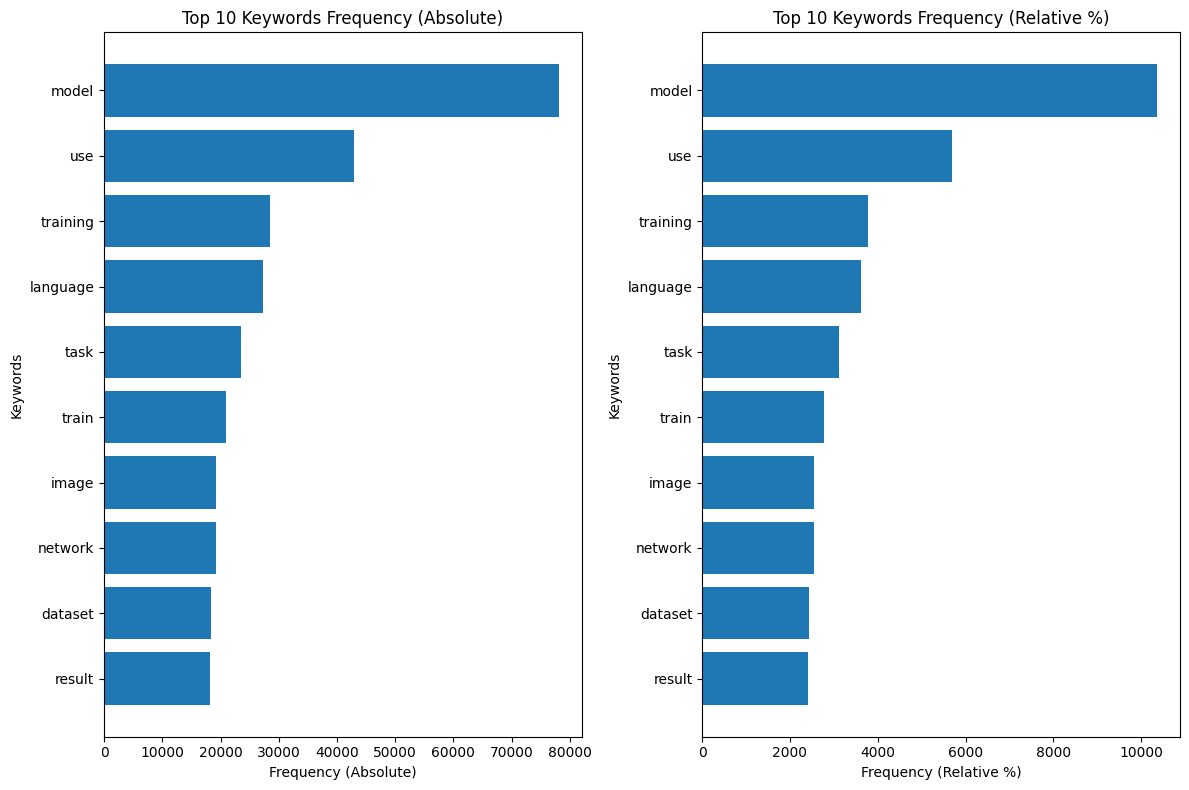

In [13]:
from tqdm import tqdm
from collections import Counter
from nltk.corpus import stopwords
import spacy
import os
import matplotlib.pyplot as plt
import wordninja

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text_folder='/content/drive/My Drive/TextPapers/'):
    """Perform keyword analysis on text files, using lemmatization to reduce words to their base form and excluding non-real words."""
    stop_words = set(stopwords.words('english')).union({'et', 'al'})
    keyword_counts = Counter()
    total_papers = 0
    for text_file in tqdm(os.listdir(text_folder)):
        if text_file.endswith('.txt'):
            total_papers += 1
            with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as f:
                text = f.read().lower()
                doc = nlp(text)
                lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 1 and not token.lemma_.startswith('/') and not token.lemma_.isdigit()]
                filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
                keyword_counts.update(filtered_lemmas)
    total_keywords = len(keyword_counts)
    return keyword_counts.most_common(), total_keywords, total_papers

keyword_analysis, total_keywords, total_papers = perform_keyword_analysis()
top_keywords = keyword_analysis[:10]
print(f"Top 10 keywords: {top_keywords}")
print(f"Total number of unique keywords assessed: {total_keywords}")
print(f"Total number of papers analyzed: {total_papers}")

# bar plot for the top keywords (absolute frequency)
keywords, counts = zip(*top_keywords)
keywords = list(keywords)
counts = list(counts)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(keywords, counts)
plt.ylabel('Keywords')
plt.xlabel('Frequency (Absolute)')
plt.title('Top 10 Keywords Frequency (Absolute)')
plt.gca().invert_yaxis()

# new add: bar plot for the top keywords (relative frequency)
relative_counts = [count / total_papers * 100 for count in counts]
plt.subplot(1, 2, 2)
plt.barh(keywords, relative_counts)
plt.ylabel('Keywords')
plt.xlabel('Frequency (Relative %)')
plt.title('Top 10 Keywords Frequency (Relative %)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# Keyword Extraction over time

Question: What is the frequency of the top keywords over time?
(I combine this into

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


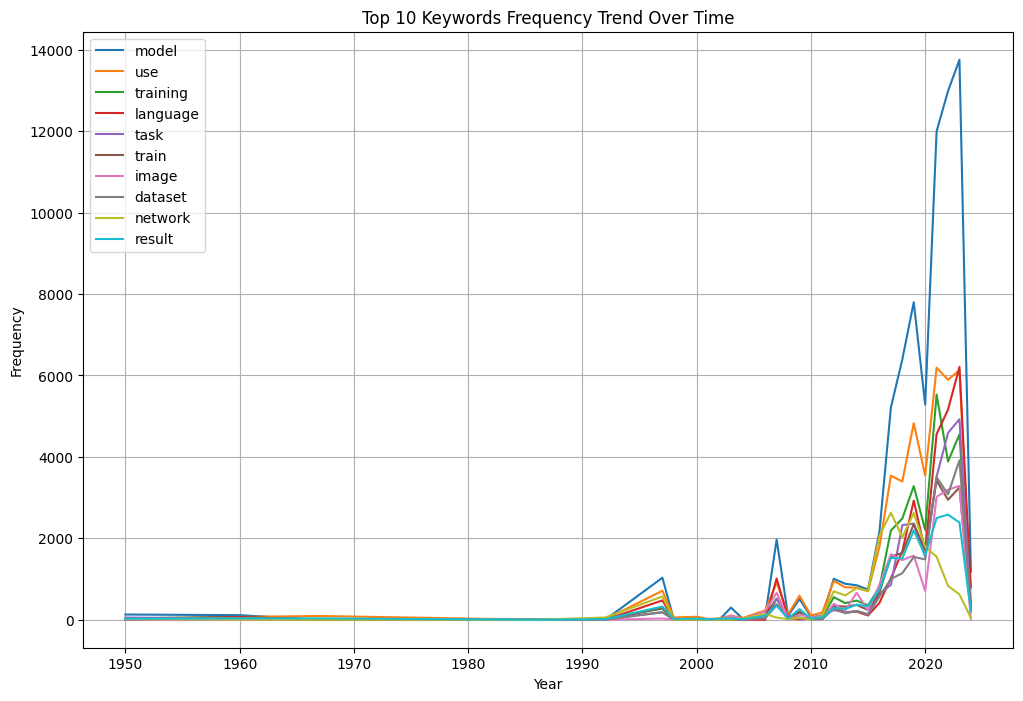

Total papers analyzed: 745
Year 2019: 93 papers analyzed
Year 2020: 63 papers analyzed
Year 2023: 95 papers analyzed
Year 2018: 63 papers analyzed
Year 2014: 21 papers analyzed
Year 2022: 83 papers analyzed
Year 2021: 97 papers analyzed
Year 2007: 12 papers analyzed
Year 1997: 17 papers analyzed
Year 2016: 40 papers analyzed
Year 1960: 2 papers analyzed
Year 2012: 20 papers analyzed
Year 2013: 16 papers analyzed
Year 2017: 74 papers analyzed
Year 1992: 1 papers analyzed
Year 2009: 6 papers analyzed
Year 2015: 14 papers analyzed
Year 2003: 3 papers analyzed
Year 2011: 3 papers analyzed
Year 2008: 2 papers analyzed
Year 2024: 6 papers analyzed
Year 2006: 4 papers analyzed
Year 1998: 1 papers analyzed
Year 2004: 1 papers analyzed
Year 2010: 2 papers analyzed
Year 1950: 1 papers analyzed
Year 2002: 1 papers analyzed
Year 2001: 1 papers analyzed
Year 2000: 1 papers analyzed
Year 1986: 1 papers analyzed
Year 1967: 1 papers analyzed


In [10]:
from google.colab import drive
drive.mount('/content/drive')

!pip install fuzzywuzzy[speedup]
import pandas as pd
import os
from collections import Counter
import spacy
from nltk.corpus import stopwords
import nltk
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import wordninja

nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english')).union({'et', 'al'})

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text):
    """Performs keyword analysis on text, using lemmatization and excluding stopwords and non-real words."""
    nlp.max_length = len(text) + 10000
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in stop_words and token.pos_ != 'PUNCT' and not token.lemma_.isdigit() and len(token.lemma_) > 1 and not token.lemma_.startswith('/')]
    filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
    lemma_freq = Counter(filtered_lemmas)
    return lemma_freq.most_common()

def find_best_match(name, choices, threshold=80):
    """Gets the best match for a given name from a list of choices, with a minimum similarity threshold."""
    match = process.extractOne(name, choices)
    if match:
        best_match, score, _ = match
        if score >= threshold:
            return best_match
    return None

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# Step 1: Get publication year
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# Preprocess the System names in the dataset
processed_system_names = pcd_dataset['System'].str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

# Step 2: Group text files by publication year
text_files_by_year = {}
text_folder = '/content/drive/My Drive/TextPapers/'
for text_file in os.listdir(text_folder):
    article_name = text_file.replace('.txt', '').replace('_', ' ')
    best_match = find_best_match(article_name, processed_system_names)
    if best_match is None:
        print(f"Warning: No matching entry found in dataset for text file '{text_file}'")
        continue
    year = pcd_dataset[processed_system_names == best_match]['Publication Year'].values[0]
    if year not in text_files_by_year:
        text_files_by_year[year] = []
    with open(f'{text_folder}{text_file}', 'r', encoding='utf-8') as f:
        text_content = f.read()
        text_files_by_year[year].append(text_content)

# Step 3: Keyword analysis for each year
keywords_by_year = {}
papers_count_by_year = {}
for year, texts in text_files_by_year.items():
    all_text = ' '.join(texts)
    keywords_by_year[year] = perform_keyword_analysis(all_text)
    papers_count_by_year[year] = len(texts)

# Identify the top 10 keywords across all years
all_keywords_freq = Counter()
for year, keywords in keywords_by_year.items():
    all_keywords_freq.update(dict(keywords))
top_10_keywords = [keyword for keyword, _ in all_keywords_freq.most_common(10)]

# Track the frequency of the top 10 keywords over each year
top_keywords_freq_by_year = {year: {keyword: 0 for keyword in top_10_keywords} for year in sorted(keywords_by_year.keys())}
for year, keywords in keywords_by_year.items():
    year_keywords_freq = dict(keywords)
    for keyword in top_10_keywords:
        top_keywords_freq_by_year[year][keyword] = year_keywords_freq.get(keyword, 0)

# Plot the frequency of the top 10 keywords over time
plt.figure(figsize=(12, 8))
for keyword in top_10_keywords:
    plt.plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Top 10 Keywords Frequency Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Print total papers analyzed
total_papers_analyzed = sum(papers_count_by_year.values())
print(f"Total papers analyzed: {total_papers_analyzed}")

# Print papers analyzed per year
for year, count in papers_count_by_year.items():
    print(f"Year {year}: {count} papers analyzed")



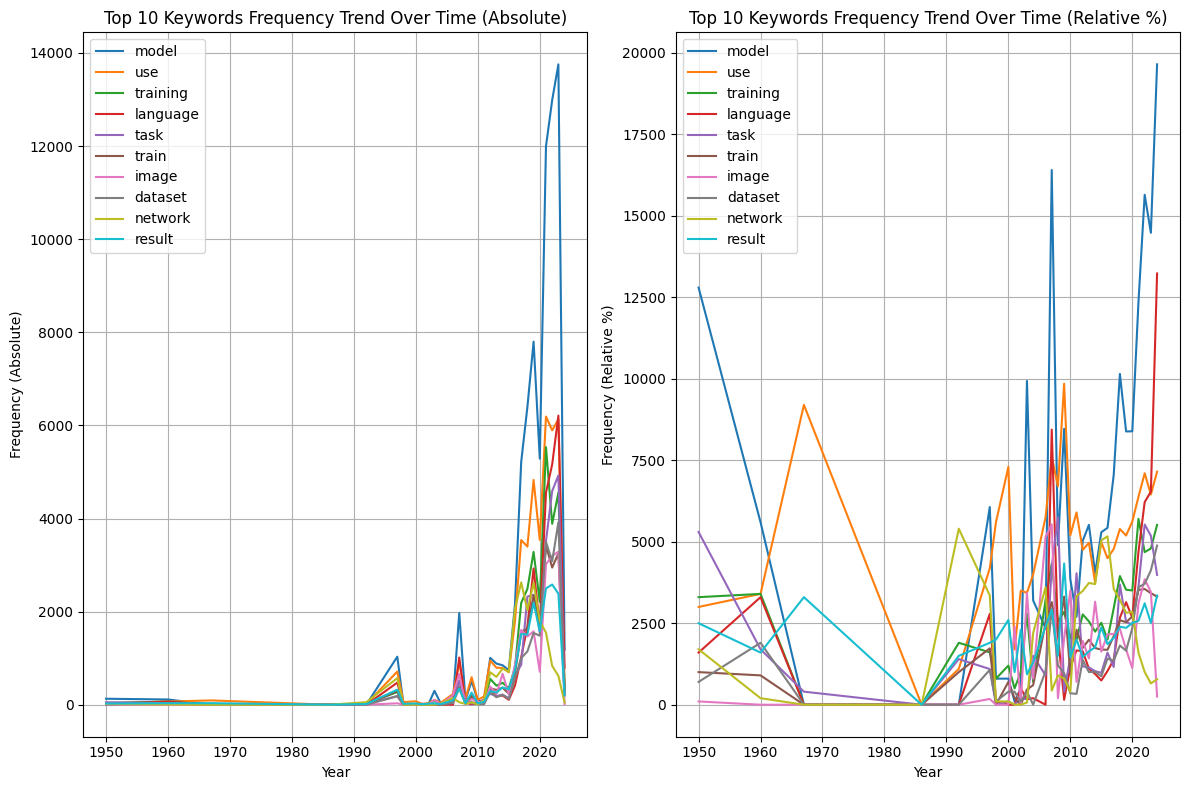

In [14]:
import matplotlib.pyplot as plt

# absolute frequency of the top 10 keywords over time
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
for keyword in top_10_keywords:
    plt.plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
plt.xlabel('Year')
plt.ylabel('Frequency (Absolute)')
plt.title('Top 10 Keywords Frequency Trend Over Time (Absolute)')
plt.legend()
plt.grid(True)

# relative frequency of the top 10 keywords over time
plt.subplot(1, 2, 2)
for keyword in top_10_keywords:
    plt.plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] / papers_count_by_year[year] * 100 for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
plt.xlabel('Year')
plt.ylabel('Frequency (Relative %)')
plt.title('Top 10 Keywords Frequency Trend Over Time (Relative %)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
